# Pokemon Dataset

In [3]:
import pandas as pd
import numpy as np

class PokemonDataSet:
    def __init__(self, path):
        self.path = path
        self.data = pd.read_csv(path)
        # print(self.data.head())

    def get_pokemon(self, pokemon_name):
        return self.data[self.data['Name'] == pokemon_name]


# ID,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
PokeDex = PokemonDataSet('Pokemon.csv')

## Plotting some data about the dataset

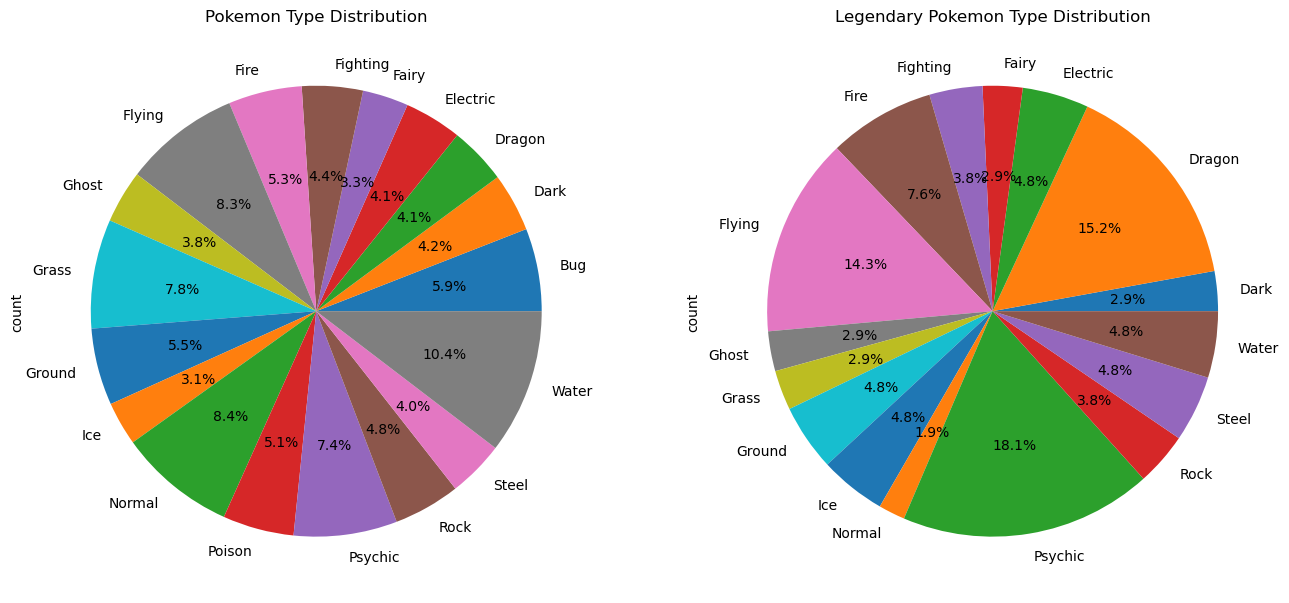

In [19]:
import matplotlib.pyplot as plt
# Plot a pie chart of the type distribution of all pokemons
# Pokemon with multiple types are counted multiple times
type1 = PokeDex.data['Type 1'].value_counts()
type2 = PokeDex.data['Type 2'].value_counts()
type1 = type1.add(type2, fill_value=0)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

type1.plot.pie(autopct='%1.1f%%', ax=axs[0])
axs[0].set_title('Pokemon Type Distribution')

# Show the type distribution of legendary pokemons
legendary = PokeDex.data[PokeDex.data['Legendary'] == True]
type1 = legendary['Type 1'].value_counts()
type2 = legendary['Type 2'].value_counts()
type1 = type1.add(type2, fill_value=0)

type1.plot.pie(autopct='%1.1f%%', ax=axs[1])
axs[1].set_title('Legendary Pokemon Type Distribution')

plt.show()

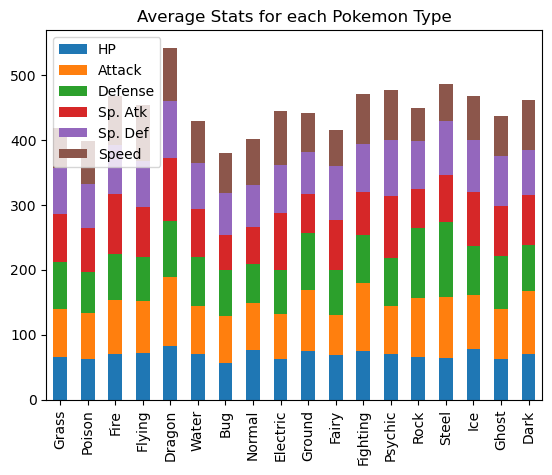

In [32]:
# Plot the Average stats for each type of pokemon

# Create a list of lists where each list contains pokemon from a specific type
pokemon_types = {}
for pokemon in PokeDex.data.iterrows():
  pokemon = pokemon[1]
  if pokemon['Type 1'] not in pokemon_types:
    pokemon_types[pokemon['Type 1']] = []
  pokemon_types[pokemon['Type 1']].append(pokemon)
  
  if pd.notna(pokemon['Type 2']):
    if pokemon['Type 2'] not in pokemon_types:
      pokemon_types[pokemon['Type 2']] = []
    pokemon_types[pokemon['Type 2']].append(pokemon)

# Verify we got all 18 types
assert len(pokemon_types) == 18

# Calculate the average stats for each type
average_stats = {}
for type, pokemons in pokemon_types.items():
  stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
  stats_sum = [0] * len(stats)
  for pokemon in pokemons:
    for i, stat in enumerate(stats):
      stats_sum[i] += pokemon[stat]
  average_stats[type] = [sum_stat / len(pokemons) for sum_stat in stats_sum]

average_stats = pd.DataFrame(average_stats, index=stats)
average_stats = average_stats.T
average_stats.plot.bar(stacked=True)
plt.title('Average Stats for each Pokemon Type')
plt.show()

## Analysis on Legendary Pokemon

In [38]:
# Collect all the legendaries
legendaries = PokeDex.data[PokeDex.data['Legendary'] == True]
print(f'There are {len(legendaries)} legendary pokemons, which is {len(legendaries) / len(PokeDex.data) * 100:.2f}% of all pokemons')


There are 65 legendary pokemons, which is 8.12% of all pokemons
